In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import json
from io import StringIO
import utilityOT
%matplotlib inline
from IPython.display import display, HTML 
sns.set_context("talk")
sns.set_style("whitegrid")


In [2]:
#We are now at the starting point - we have a list of genes in a file named random_gene_names_100.txt
#and we want to go see what Oper Targets has for these genes

gene_names_list = utilityOT.read_genes_from_file_r('GPCR_list.txt')
#print gene_names_list
print "Found " + str(len(gene_names_list)) +" targets"

Found 404 targets


In [3]:
#OT API takes target ENS codes, so lets get them
myTargets = utilityOT.get_ens_genes(gene_names_list, 'http://targetvalidation.org/api/latest/')
#print myTargets

In [4]:
#we also can save this into a file if we want to keep it and use read from file function 
utilityOT.write_genes_to_file('gene_ens_codes.txt', myTargets)

In [2]:
#Comment this out if you run the whole notebook at once
myTargets = utilityOT.read_genes_from_file('gene_ens_codes.txt')
#Here we provide disease name, list of ENS target codes,
#file we want the results to be saved to(it will be saved with .cvs extension)
#and version of OT URL 

alzheimerCountsTextCSV1 = utilityOT.get_disease_and_target_evidence_count('alzheimers disease', myTargets[:100], 'alzheimer_counts1')
alzheimerCountsTextCSV2 = utilityOT.get_disease_and_target_evidence_count('alzheimers disease', myTargets[100:200], 'alzheimer_counts2')
alzheimerCountsTextCSV3 = utilityOT.get_disease_and_target_evidence_count('alzheimers disease', myTargets[200:300], 'alzheimer_counts3')
alzheimerCountsTextCSV4 = utilityOT.get_disease_and_target_evidence_count('alzheimers disease', myTargets[300:404], 'alzheimer_counts4')
#lateralSclerosisCountsTextCSV = utilityOT.get_disease_and_target_evidence_count('amyotrophic lateral sclerosis', myTargets, 'amyotrophyc_lateral_sclerosis_counts')

EFO for alzheimers disease is EFO_0000249
response status_code = 200
EFO for alzheimers disease is EFO_0000249
response status_code = 200
EFO for alzheimers disease is EFO_0000249
response status_code = 200
EFO for alzheimers disease is EFO_0000249
response status_code = 200


In [3]:
#This function edits long header names: for example abc.abc.de will become de
#14 is the number of columns
utilityOT.edit_header('alzheimer_counts1.csv', 'alzheimer_counts_new_header1.csv', 14)
utilityOT.edit_header('alzheimer_counts2.csv', 'alzheimer_counts_new_header2.csv', 14)
utilityOT.edit_header('alzheimer_counts3.csv', 'alzheimer_counts_new_header3.csv', 14)
utilityOT.edit_header('alzheimer_counts4.csv', 'alzheimer_counts_new_header4.csv', 14)
## dataTypes: genetic_association,somatic_mutation,known_drug,affected_pathway,rna_expression,literature,animal_model
##We selected to also show us the datasources -only the ones for the genetic evidence for this case:
#gwas_catalog,eva,eva_somatic,gwas_catalog,uniprot,uniprot_literature

symbol,total,genetic_association,somatic_mutation,known_drug,affected_pathway,rna_expression,literature,animal_model,gwas_catalog,eva,eva_somatic,uniprot,uniprot_literature

symbol,total,genetic_association,somatic_mutation,known_drug,affected_pathway,rna_expression,literature,animal_model,gwas_catalog,eva,eva_somatic,uniprot,uniprot_literature

symbol,total,genetic_association,somatic_mutation,known_drug,affected_pathway,rna_expression,literature,animal_model,gwas_catalog,eva,eva_somatic,uniprot,uniprot_literature

symbol,total,genetic_association,somatic_mutation,known_drug,affected_pathway,rna_expression,literature,animal_model,gwas_catalog,eva,eva_somatic,uniprot,uniprot_literature



In [ ]:
#utilityOT.edit_header('amyotrophyc_lateral_sclerosis_counts.csv', 'amyotrophyc_lateral_sclerosis_counts_new_header.csv', 14)

In [4]:
dfAlzheimer1 = pd.read_csv('alzheimer_counts_new_header1.csv',header=0,index_col=0)
dfAlzheimer2 = pd.read_csv('alzheimer_counts_new_header2.csv',header=0,index_col=0)
dfAlzheimer3 = pd.read_csv('alzheimer_counts_new_header3.csv',header=0,index_col=0)
dfAlzheimer4 = pd.read_csv('alzheimer_counts_new_header4.csv',header=0,index_col=0)
#we could also read_csv directy from our object, and modify headers
#dfAlzheimer = pd.read_csv(StringIO(alzheimerCountsTextCSV),header=0,index_col=0)

In [5]:
frames = [dfAlzheimer1,dfAlzheimer2,dfAlzheimer3,dfAlzheimer4]
dfAlzheimer = pd.concat(frames)

In [6]:
#Mendelian = 'uniprot'+'uniprot_literature'+'eva' + 'eva_somatic'
dfAlzheimer['mendelian'] = dfAlzheimer.apply (lambda row: utilityOT.get_mendelian_count (row), axis=1)
#print dfAlzheimer

# Show evidence counts broken down by evidence type for Alzheimer

Have 114 targets with evidence.


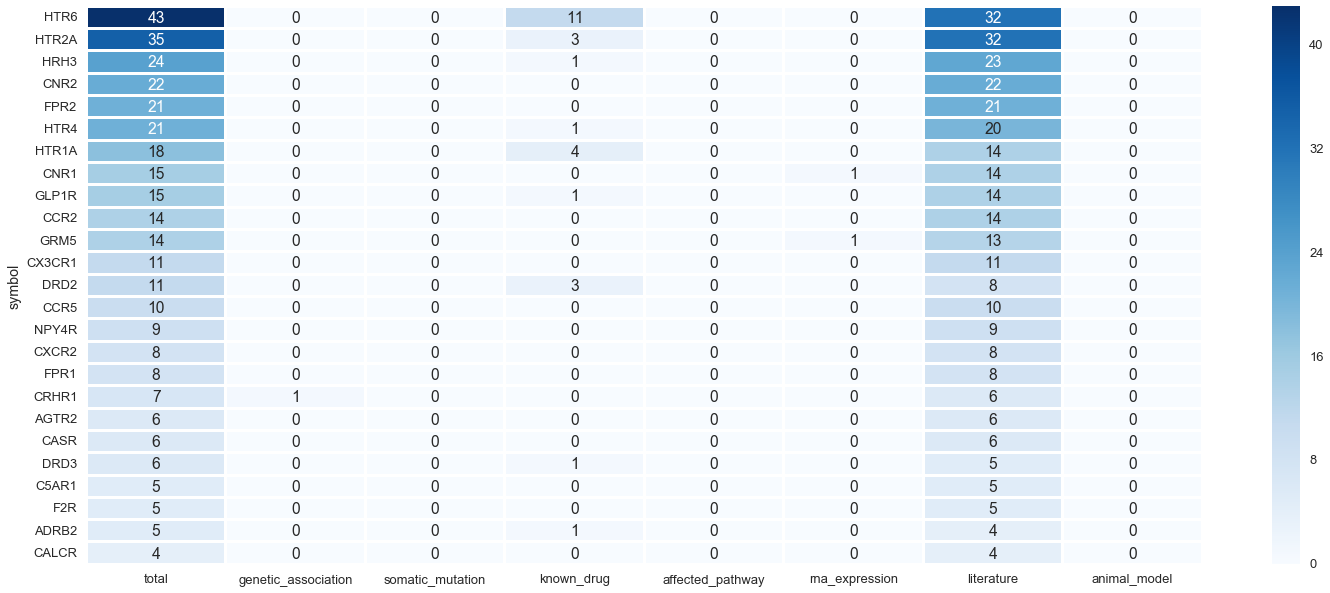

In [8]:
dfAlzheimerRows = len(dfAlzheimer.index)
print "Have " +str(dfAlzheimerRows)+ " targets with evidence."
dfAlzheimerSorted = dfAlzheimer.sort_values(['total','genetic_association','literature'], ascending=[0,0,0])
#dfAlzheimerSorted = dfAlzheimer.sort(['animal_model'], ascending=[0])
#print dfAlzheimerRows
dfEvidenceTypes = dfAlzheimerSorted.iloc[0:25, 0:8]
utilityOT.show_heatmap(dfEvidenceTypes, 25,10) #15 *10 inches 



# Further break down for genetic association evidence mendelian vs gwas

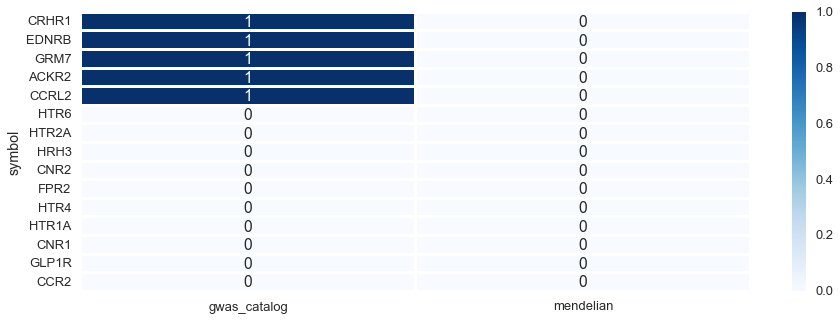

In [9]:
dfAlzheimerSortedGenetic = dfAlzheimer.sort_values(['genetic_association','total'], ascending=[0,0])
dfGeneticEvidence= dfAlzheimerSortedGenetic.ix[0:15, ['gwas_catalog', 'mendelian']]
utilityOT.show_heatmap(dfGeneticEvidence, 15) #15 inches

In [14]:
ensCode = utilityOT.get_ensid("HTR6") 
print ensCode

ensCode = utilityOT.get_ensid("CRHR1") 
print ensCode

 

ENSG00000158748
ENSG00000120088


More on HTR6->Parkinsons evidence [here](https://www.targetvalidation.org/evidence/ENSG00000158748/EFO_0000249)<p>
More on CRHR1->Parkinsons [here](https://www.targetvalidation.org/evidence/ENSG00000120088/EFO_0000249)   

# Lets do the same for therapeutic area

EFO for nervous system disease is EFO_0000618
response status_code = 200
EFO for nervous system disease is EFO_0000618
response status_code = 200
EFO for nervous system disease is EFO_0000618
response status_code = 200
EFO for nervous system disease is EFO_0000618
response status_code = 200
symbol,total,genetic_association,somatic_mutation,known_drug,affected_pathway,rna_expression,literature,animal_model,gwas_catalog,eva,eva_somatic,uniprot,uniprot_literature

symbol,total,genetic_association,somatic_mutation,known_drug,affected_pathway,rna_expression,literature,animal_model,gwas_catalog,eva,eva_somatic,uniprot,uniprot_literature

symbol,total,genetic_association,somatic_mutation,known_drug,affected_pathway,rna_expression,literature,animal_model,gwas_catalog,eva,eva_somatic,uniprot,uniprot_literature

symbol,total,genetic_association,somatic_mutation,known_drug,affected_pathway,rna_expression,literature,animal_model,gwas_catalog,eva,eva_somatic,uniprot,uniprot_literature

Have 335 tar

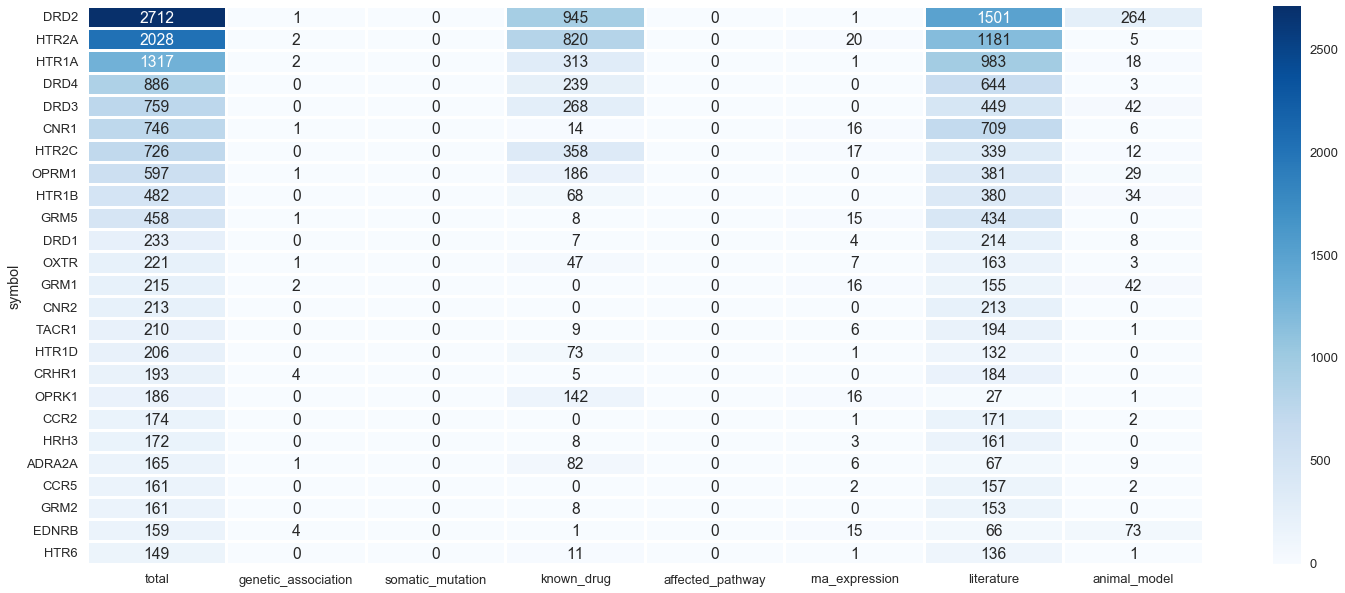

In [16]:
#nervous system disease
#Comment this out if you run the whole notebook at once
myTargets = utilityOT.read_genes_from_file('gene_ens_codes.txt')
#Here we provide disease name, list of ENS target codes,
#file we want the results to be saved to(it will be saved with .cvs extension)
#and version of OT URL 

nCountsTextCSV1 = utilityOT.get_disease_and_target_evidence_count('nervous system disease', myTargets[:100], 'n_counts1')
nCountsTextCSV2 = utilityOT.get_disease_and_target_evidence_count('nervous system disease', myTargets[100:200], 'n_counts2')
nCountsTextCSV3 = utilityOT.get_disease_and_target_evidence_count('nervous system disease', myTargets[200:300], 'n_counts3')
nCountsTextCSV4 = utilityOT.get_disease_and_target_evidence_count('nervous system disease', myTargets[300:404], 'n_counts4')

utilityOT.edit_header('n_counts1.csv', 'n_counts_new_header1.csv', 14)
utilityOT.edit_header('n_counts2.csv', 'n_counts_new_header2.csv', 14)
utilityOT.edit_header('n_counts3.csv', 'n_counts_new_header3.csv', 14)
utilityOT.edit_header('n_counts4.csv', 'n_counts_new_header4.csv', 14)

dfN1 = pd.read_csv('n_counts_new_header1.csv',header=0,index_col=0)
dfN2 = pd.read_csv('n_counts_new_header2.csv',header=0,index_col=0)
dfN3 = pd.read_csv('n_counts_new_header3.csv',header=0,index_col=0)
dfN4 = pd.read_csv('n_counts_new_header4.csv',header=0,index_col=0)

frames = [dfN1,dfN2,dfN3,dfN4]
dfN = pd.concat(frames)
dfN['mendelian'] = dfN.apply (lambda row: utilityOT.get_mendelian_count (row), axis=1)
dfNRows = len(dfN.index)
print "Have " +str(dfNRows)+ " targets with evidence."
dfNSorted = dfN.sort_values(['total','genetic_association','literature'], ascending=[0,0,0])
#dfNSorted = dfAlzheimer.sort(['animal_model'], ascending=[0])
#print dfNRows
dfEvidenceTypesN = dfNSorted.iloc[0:25, 0:8]
utilityOT.show_heatmap(dfEvidenceTypesN, 25,10) #15 *10 inches 


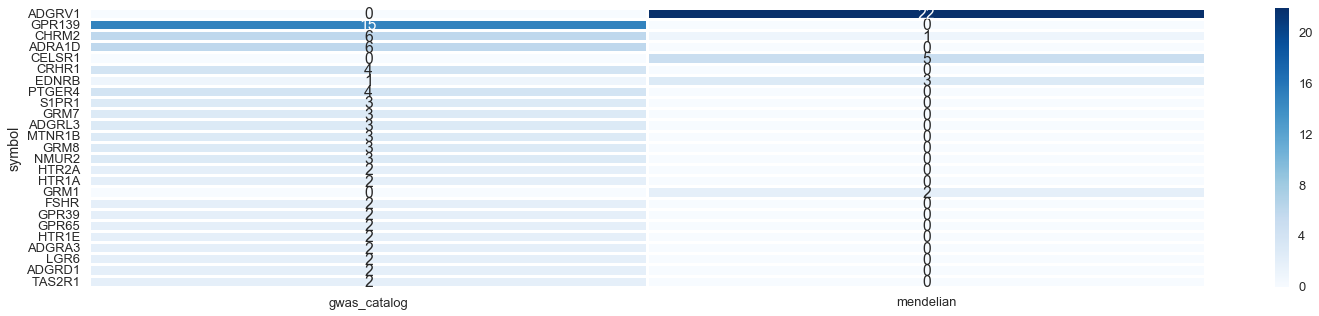

In [18]:
dfNSortedGenetic = dfN.sort_values(['genetic_association','total'], ascending=[0,0])
dfGeneticEvidenceN= dfNSortedGenetic.ix[0:25, ['gwas_catalog', 'mendelian']]
utilityOT.show_heatmap(dfGeneticEvidenceN, 25,10) #15 inches